# MNIST Digit Classification using TensorFlow

## Introduction
This notebook will demonstrate an end-to-end machine learning project with TensorFlow and Keras using the MNIST dataset, a collection of handwritten digits. We will explore different neural network architectures and compare their performance in digit classification.

## 1. Data Loading
The MNIST dataset is conveniently included in TensorFlow's dataset library.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_val = X_test[:5000]
y_val = y_test[:5000]

X_test = X_test[5000:]
y_test = y_test[5000:]

print('Training Images   : ',X_train.shape[0])
print('Testing Images    : ',X_test.shape[0])
print('Validation Images : ',X_val.shape[0])

# X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') / 255
# X_test  = X_test.reshape (60000, 28, 28, 1).astype('float32') / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Images   :  60000
Testing Images    :  5000
Validation Images :  5000


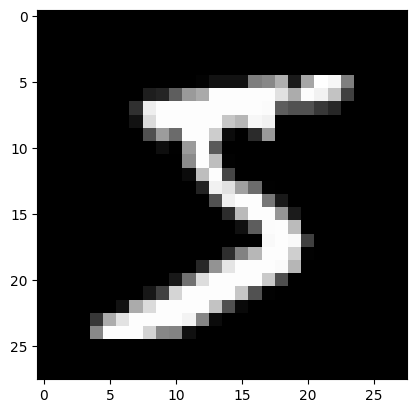

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape((1,784)), cmap='gray')
plt.axis('off')
plt.show()

## 2. Data Preprocessing
The images are normalized to have values between 0 and 1. Labels are one-hot encoded.

In [4]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)
y_val  = tf.keras.utils.to_categorical(y_val, 10)

## 3. Building Neural Network Models
We will construct three different models: a basic ANN, a LeNet-5 inspired CNN, and a more complex CNN.

### 3.1 Basic ANN Model

In [5]:
model_ann = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_ann.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 3.2 LeNet-5 Inspired CNN Model

In [6]:
model_lenet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 3.3 A More Complex CNN Model

In [7]:
model_complex = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_complex.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 4. Training the Models
Train each model and capture their training histories.

In [8]:
history_ann     = model_ann.fit    (X_train, y_train, epochs=10, validation_data = (X_val,y_val), batch_size=64)
history_lenet   = model_lenet.fit  (X_train, y_train, epochs=10, validation_data = (X_val,y_val), batch_size=64)
history_complex = model_complex.fit(X_train, y_train, epochs=10, validation_data = (X_val,y_val), batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8059 - loss: 9.9204 - val_accuracy: 0.8510 - val_loss: 0.7767
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8955 - loss: 0.4803 - val_accuracy: 0.8942 - val_loss: 0.5020
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9238 - loss: 0.3057 - val_accuracy: 0.9146 - val_loss: 0.4551
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9397 - loss: 0.2314 - val_accuracy: 0.9162 - val_loss: 0.3922
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9489 - loss: 0.1956 - val_accuracy: 0.9282 - val_loss: 0.3316
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9539 - loss: 0.1689 - val_accuracy: 0.9320 - val_loss: 0.3358
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9562 - loss: 0.1626 - val_accuracy: 0.9346 - val_loss: 0.2936
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9590 - loss: 0.1524 - val_accuracy: 0.

## 5. Evaluating and Comparing Model Performance
### 5.1 Comparing as per Test Data

In [9]:
test_loss_ann, test_acc_ann = model_ann.evaluate(X_test, y_test, verbose=2)
test_loss_lenet, test_acc_lenet = model_lenet.evaluate(X_test, y_test, verbose=2)
test_loss_complex, test_acc_complex = model_complex.evaluate(X_test, y_test, verbose=2)

print(f'ANN Test Accuracy: {test_acc_ann:.4f}')
print(f'LeNet-5 Inspired CNN Test Accuracy: {test_acc_lenet:.4f}')
print(f'Complex CNN Test Accuracy: {test_acc_complex:.4f}')

157/157 - 1s - 4ms/step - accuracy: 0.9644 - loss: 0.1655
157/157 - 1s - 5ms/step - accuracy: 0.9904 - loss: 0.0334
157/157 - 1s - 6ms/step - accuracy: 0.9976 - loss: 0.0115
ANN Test Accuracy: 0.9644
LeNet-5 Inspired CNN Test Accuracy: 0.9904
Complex CNN Test Accuracy: 0.9976


### 5.2 Comparing as per Hisotory

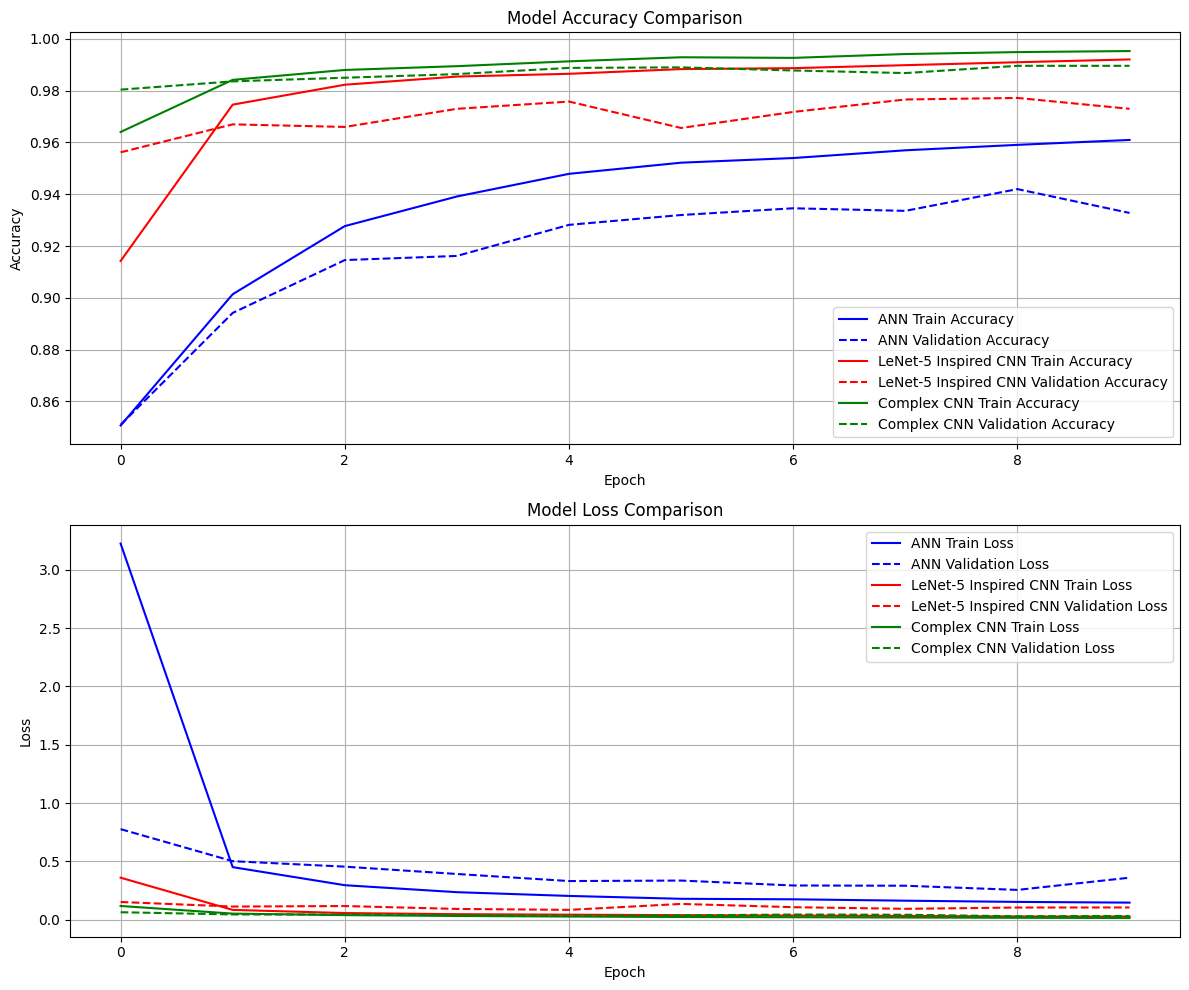

In [12]:
def plot_training_history_combined(history_list, model_names):
    plt.figure(figsize=(12, 10))

    colors = ['blue', 'red', 'green'] # Define a list of distinct colors

    # Plot accuracy for all models
    plt.subplot(2, 1, 1)
    for i, (history, name) in enumerate(zip(history_list, model_names)):
        plt.plot(history.history['accuracy'], label=f'{name} Train Accuracy', color=colors[i], linestyle='-')
        plt.plot(history.history['val_accuracy'], label=f'{name} Validation Accuracy', color=colors[i], linestyle='--')
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.grid(True)

    # Plot loss for all models
    plt.subplot(2, 1, 2)
    for i, (history, name) in enumerate(zip(history_list, model_names)):
        plt.plot(history.history['loss'], label=f'{name} Train Loss', color=colors[i], linestyle='-')
        plt.plot(history.history['val_loss'], label=f'{name} Validation Loss', color=colors[i], linestyle='--')
    plt.title('Model Loss Comparison')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# List of histories and model names
history_list = [history_ann, history_lenet, history_complex]
model_names = ['ANN', 'LeNet-5 Inspired CNN', 'Complex CNN']

# Plot the combined history
plot_training_history_combined(history_list, model_names)

## 6. Saving Models
Summarize findings, discuss which model performed best, and suggest potential improvements or further experiments.

In [18]:
model_ann.save('model_ann.h5')
model_lenet.save('model_lenet.h5')
model_complex.save('model_complex.h5')

# 7. Inference

In [19]:
import requests

image_url = "https://cdn.pixabay.com/photo/2015/04/04/19/13/two-706896_1280.jpg"
filename = "image.jpg"

response = requests.get(image_url, stream=True)

with open(filename, "wb") as f:
    for chunk in response.iter_content(1024):
        f.write(chunk)

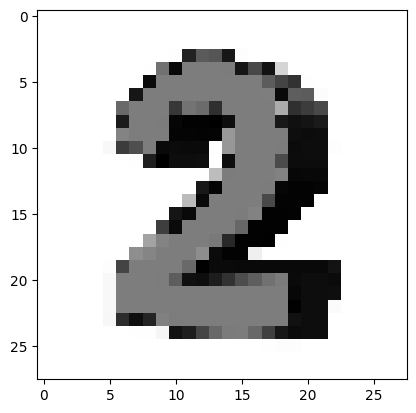

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
ANN prediction (original image): 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
LeNet-5 CNN prediction (original image): 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step
Complex CNN prediction (original image): 8


In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('image.jpg')

resized_img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)


plt.imshow(resized_img, cmap='gray')
plt.show()

print(f'ANN prediction (original image): {np.argmax(model_ann.predict(resized_img.reshape(1, 28, 28)))}')
print(f'LeNet-5 CNN prediction (original image): {np.argmax(model_lenet.predict(resized_img.reshape(1, 28, 28, 1)))}')
print(f'Complex CNN prediction (original image): {np.argmax(model_complex.predict(resized_img.reshape(1, 28, 28, 1)))}')

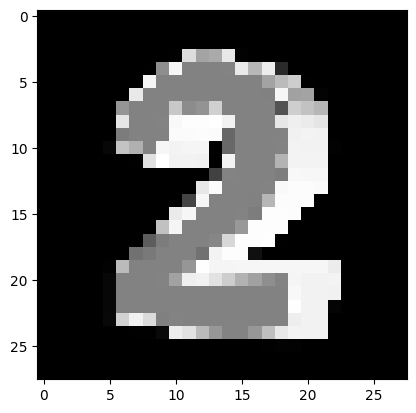

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
ANN prediction (inverted image): 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
LeNet-5 CNN prediction (inverted image): 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Complex CNN prediction (inverted image): 2


In [49]:
# Invert the colors of the resized grayscale image
inverted_resized_img = 255 - resized_img

plt.imshow(inverted_resized_img, cmap='gray')
plt.show()

# Predict using the ANN model with the inverted image
print(f'ANN prediction (inverted image): {np.argmax(model_ann.predict(inverted_resized_img.reshape(1, 28, 28)))}')
print(f'LeNet-5 CNN prediction (inverted image): {np.argmax(model_lenet.predict(inverted_resized_img.reshape(1, 28, 28, 1)))}')
print(f'Complex CNN prediction (inverted image): {np.argmax(model_complex.predict(inverted_resized_img.reshape(1, 28, 28, 1)))}')

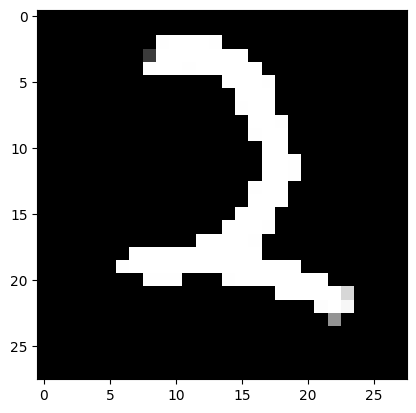

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
ANN prediction (original image): 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
LeNet-5 CNN prediction (original image): 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Complex CNN prediction (original image): 2


In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('1.png')

resized_img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)


plt.imshow(resized_img, cmap='gray')
plt.show()

print(f'ANN prediction (original image): {np.argmax(model_ann.predict(resized_img.reshape(1, 28, 28)))}')
print(f'LeNet-5 CNN prediction (original image): {np.argmax(model_lenet.predict(resized_img.reshape(1, 28, 28, 1)))}')
print(f'Complex CNN prediction (original image): {np.argmax(model_complex.predict(resized_img.reshape(1, 28, 28, 1)))}')

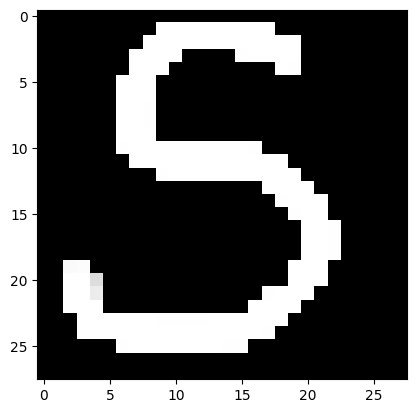

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
ANN prediction (original image): 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
LeNet-5 CNN prediction (original image): 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Complex CNN prediction (original image): 5


In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('2.png')

resized_img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)


plt.imshow(resized_img, cmap='gray')
plt.show()

print(f'ANN prediction (original image): {np.argmax(model_ann.predict(resized_img.reshape(1, 28, 28)))}')
print(f'LeNet-5 CNN prediction (original image): {np.argmax(model_lenet.predict(resized_img.reshape(1, 28, 28, 1)))}')
print(f'Complex CNN prediction (original image): {np.argmax(model_complex.predict(resized_img.reshape(1, 28, 28, 1)))}')

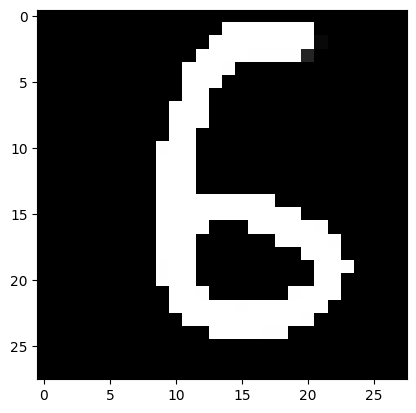

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
ANN prediction (original image): 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
LeNet-5 CNN prediction (original image): 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Complex CNN prediction (original image): 6


In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('3.png')

resized_img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)


plt.imshow(resized_img, cmap='gray')
plt.show()

print(f'ANN prediction (original image): {np.argmax(model_ann.predict(resized_img.reshape(1, 28, 28)))}')
print(f'LeNet-5 CNN prediction (original image): {np.argmax(model_lenet.predict(resized_img.reshape(1, 28, 28, 1)))}')
print(f'Complex CNN prediction (original image): {np.argmax(model_complex.predict(resized_img.reshape(1, 28, 28, 1)))}')

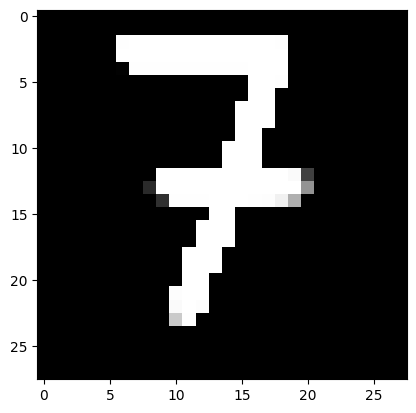

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
ANN prediction (original image): 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
LeNet-5 CNN prediction (original image): 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Complex CNN prediction (original image): 7


In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('4.png')

resized_img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)


plt.imshow(resized_img, cmap='gray')
plt.show()

print(f'ANN prediction (original image): {np.argmax(model_ann.predict(resized_img.reshape(1, 28, 28)))}')
print(f'LeNet-5 CNN prediction (original image): {np.argmax(model_lenet.predict(resized_img.reshape(1, 28, 28, 1)))}')
print(f'Complex CNN prediction (original image): {np.argmax(model_complex.predict(resized_img.reshape(1, 28, 28, 1)))}')

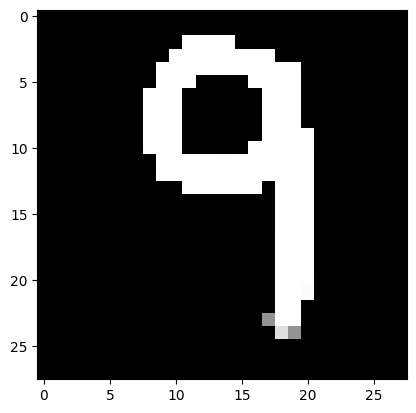

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
ANN prediction (original image): 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
LeNet-5 CNN prediction (original image): 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Complex CNN prediction (original image): 9


In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('5.png')

resized_img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)


plt.imshow(resized_img, cmap='gray')
plt.show()

print(f'ANN prediction (original image): {np.argmax(model_ann.predict(resized_img.reshape(1, 28, 28)))}')
print(f'LeNet-5 CNN prediction (original image): {np.argmax(model_lenet.predict(resized_img.reshape(1, 28, 28, 1)))}')
print(f'Complex CNN prediction (original image): {np.argmax(model_complex.predict(resized_img.reshape(1, 28, 28, 1)))}')